# GET THE DATA

In [108]:
library(urca)
print("var head")
data(nporg)
head(na.omit(nporg$ur,year))
print("var tail")
tail(nporg$ur)
print("Variable description")
summary(nporg$ur)
print("Logged variable description")
summary(log(nporg$ur))
y <- ts(na.omit(nporg$ur,start=1890),
        frequency=1)


[1] "var head"


[1]  4.0  5.4  3.0 11.7 18.4 13.7

[1] "var tail"


[1] 4.5 3.8 3.8 3.6 3.5 4.9

[1] "Variable description"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.200   3.800   5.100   7.121   8.000  24.900      30 

[1] "Logged variable description"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1823  1.3350  1.6292  1.7146  2.0794  3.2149      30 

# Graphs of the data

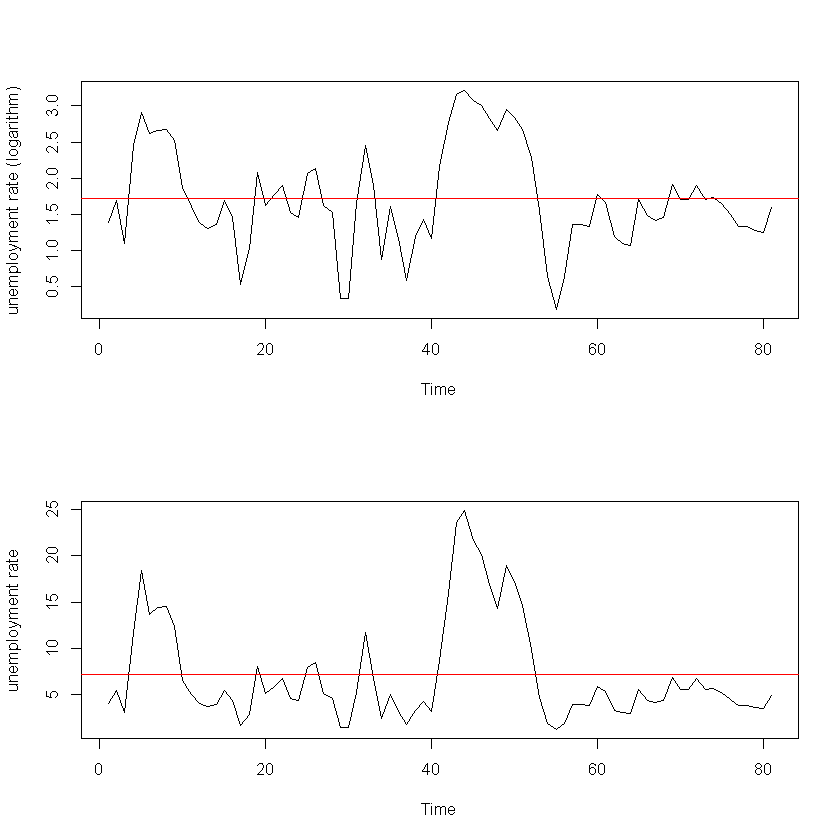

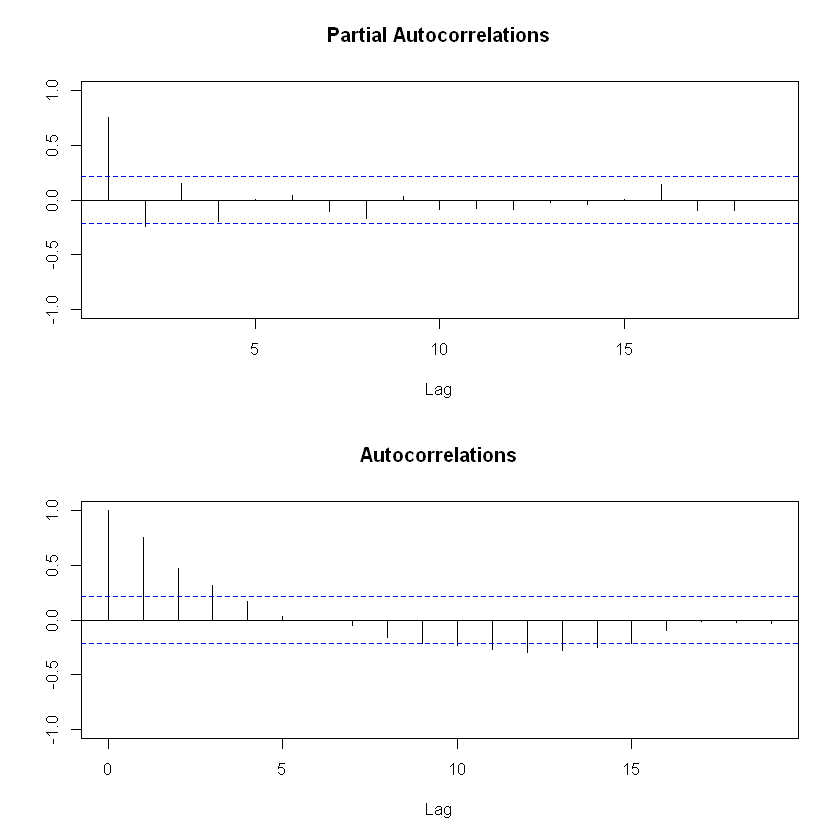

In [109]:
layout(matrix(c(2, 2, 1, 1), 2, 2, byrow=TRUE))
plot(y, ylab="unemployment rate")
abline(h=mean(y),col="red")
plot(log(y), ylab="unemployment rate (logarithm)")
abline(h=mean(log(y)),col="red")
acf(log(y), main='Autocorrelations', ylab='', ylim=c(-1, 1))
pacf(log(y), main='Partial Autocorrelations', ylab='',
     ylim=c(-1, 1))
y <- log(y) #replacing to log of ur because it gets rid of some variance

In [110]:
#number format
acf_values <- acf(y, plot = FALSE)
acf_values
pacf_values <- pacf(y, plot = FALSE)
pacf_values



Autocorrelations of series 'y', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.754  0.466  0.317  0.167  0.036 -0.006 -0.049 -0.162 -0.218 -0.228 
    11     12     13     14     15     16     17     18     19 
-0.265 -0.296 -0.278 -0.251 -0.218 -0.097 -0.010 -0.026 -0.030 


Partial autocorrelations of series 'y', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.754 -0.237  0.150 -0.194  0.002  0.043 -0.103 -0.173  0.029 -0.086 -0.075 
    12     13     14     15     16     17     18     19 
-0.084 -0.027 -0.040  0.009  0.141 -0.095 -0.096 -0.005 

#### Nelson and Plosser Results for Unemployment Rate (They also logged ur)

-Nelson - Plosser

We have the same results as Nelson and Plosser

#### Obsrvations: 
The time series plot doesn't show any clear trend or seasonal effects, and the fluctuations around the mean appear to be relatively constant over time. We also see that it is likely stationary variable, as there are relatively sharp cut offs after the first/second lag PACF and ACF. This suggests there is not long term pattern in the data.There also isn't a lot of variation from the eye inspection. Taking logs further decreases variance (mean or red line centering the data better with log), making it better for our prediction model. It is also what Nelson and Plosser did in 1982.

We see some significant correlations in the PACF for the first, and possibly second lag, so we will begin by trying with an AR and MA of two (2,2) and compare to a less complex (1,1) model with an lr test. We're trying strictly ARMA models versus one or the other because the sharp cut offs on both ACF and PACF suggest a mixed model (ARMA).

#### Will test stationarity despite looking like a stationary variable


We will see that the Dickey Fuller and even Philips test concur that there is a chance that the variable is not stationary, but due to economic theory and goodness of fit, we will treat it as stationary.


### Dickey Fuller test (Not Augmented)

In [111]:
df_result <- ur.df(y, type = "none")
print("Regular DF test")
summary(df_result)

[1] "Regular DF test"



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11929 -0.19253  0.01518  0.31795  1.46710 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)
z.lag.1    -0.03875    0.02975  -1.303    0.197
z.diff.lag  0.10812    0.11329   0.954    0.343

Residual standard error: 0.4868 on 77 degrees of freedom
Multiple R-squared:  0.02933,	Adjusted R-squared:  0.004114 
F-statistic: 1.163 on 2 and 77 DF,  p-value: 0.3179


Value of test-statistic is: -1.3028 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


#### Test statistic to the right of 5% but left of 10% therefore we cannot reject at 10% confidence. By assuming stationarity, there is a chance of type one error to be addressed shortly.

In [112]:
adf_result <- adf.test(y, alternative = "stationary")
adf_result

if(adf_result$p.value < 0.1) {
  cat("The series 'y' is stationary - according to DF -, p-value:", adf_result$p.value, "\n")
} else {
  cat("The series 'y' is not stationary - according to df - , p-value:", adf_result$p.value, "\n")
}




	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -3.0886, Lag order = 4, p-value = 0.1301
alternative hypothesis: stationary


The series 'y' is not stationary - according to df - , p-value: 0.1300679 


#### Dicky Fuller test suggests that there could be a unit root. Taking the difference once fixes this non stationarity issue according to the test. In the augmented DF test, we cannot reject the null that the series is not stationary because it is including further lags. This makes sense as the series is stationary at k=4.

#### DF test with difference of 1

In [116]:
suppressWarnings({

adf_result <- adf.test(diff(y), alternative = "stationary")
adf_result

if(adf_result$p.value < 0.05) {
  cat("The series 'y' is stationary - according to DF -, p-value:", adf_result$p.value, "\n")
} else {
  cat("The series 'y' is not stationary - according to df - , p-value:", adf_result$p.value, "\n")
}
})



The series 'y' is stationary - according to DF -, p-value: 0.01 


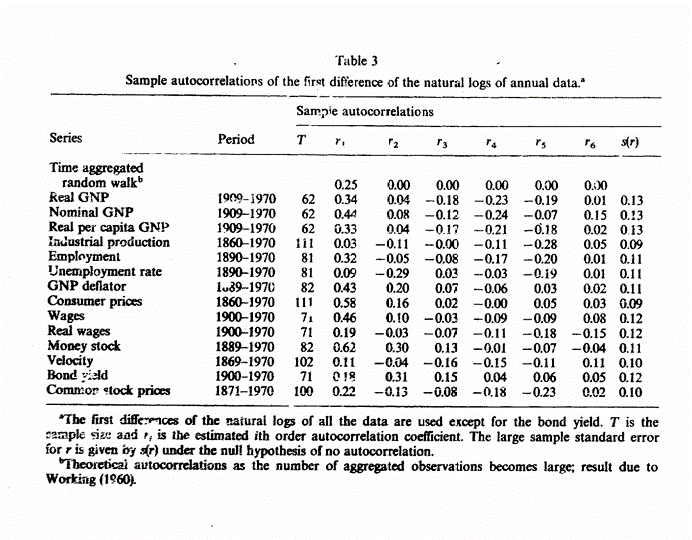
Nelson and Plosser autocorrelations of first differences

In [95]:
acf(diff(y),plot= FALSE)


Autocorrelations of series 'diff(y)', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.089 -0.294  0.026 -0.031 -0.187  0.007  0.143 -0.121 -0.101  0.048 
    11     12     13     14     15     16     17     18     19 
-0.016 -0.101 -0.018 -0.010 -0.182  0.055  0.213 -0.004  0.012 

We have the same results as Nelson and Plosser 

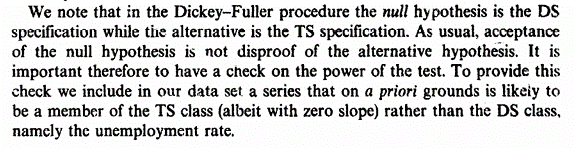
-Nelson - Plosser (1982)

#### Even though the DF tests suggest non stationarity...

because of economic theory, better modeling, as well as Nelson and Plosser conclusions, we will treat the unemployment variable as stationary. Furthermore, Nelson and Polsen performed the DF test on lag four, which showed stationarity. 

In [119]:
suppressWarnings({adf_result <- adf.test(diff(y), alternative = "stationary")
adf_result

if(adf_result$p.value < 0.05) {
  cat("The series 'y' is stationary, p-value:", adf_result$p.value, "\n")
} else {
  cat("The series 'y' is not stationary, p-value:", adf_result$p.value, "\n")
}})

The series 'y' is stationary, p-value: 0.01 


## Nelson - Plosser Results
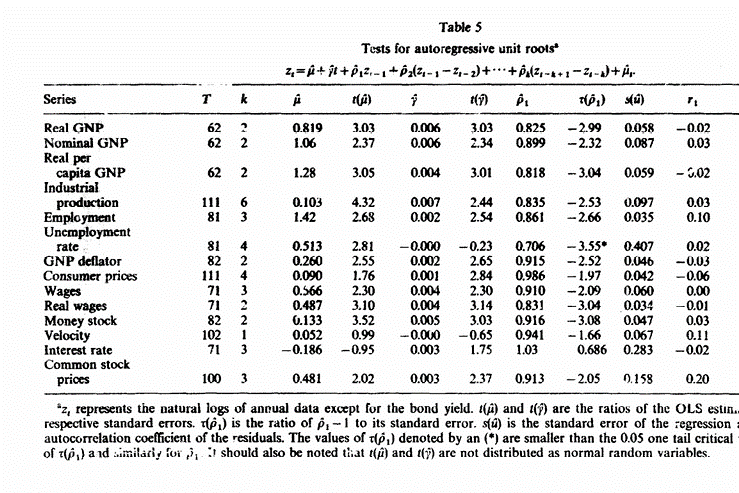

# Model Identification

### ARMA (2,2)

[1] "AIC for ARMA (2,2) is:"


[1] 103.8636


	Box-Ljung test

data:  res22
X-squared = 12.442, df = 20, p-value = 0.9



	Shapiro-Wilk normality test

data:  res22
W = 0.98494, p-value = 0.4618



	Jarque Bera Test

data:  res22
X-squared = 4.0198, df = 2, p-value = 0.134


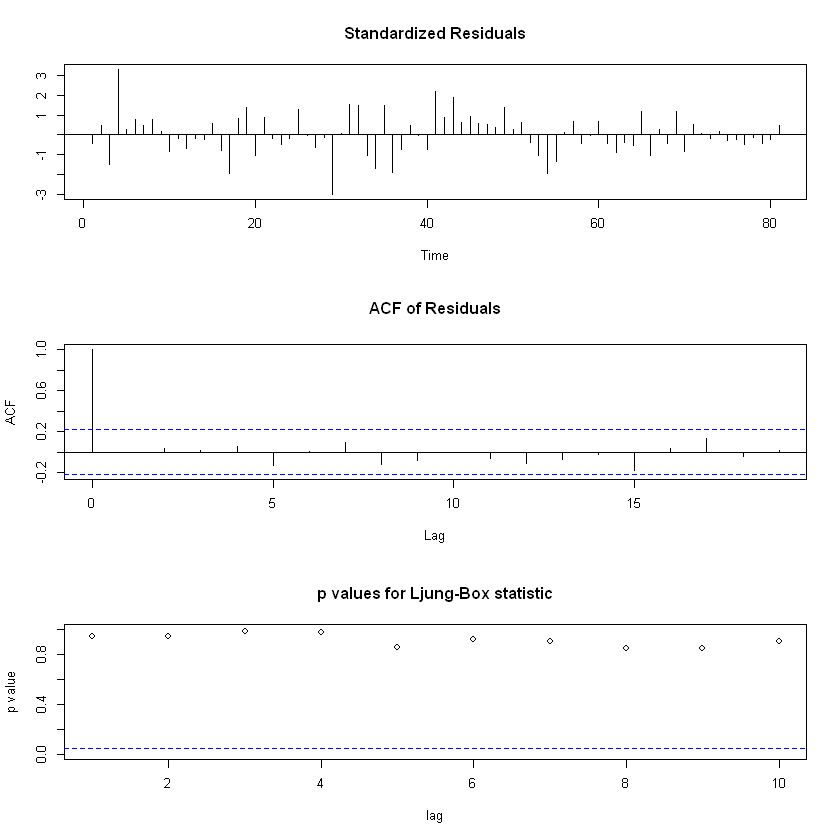

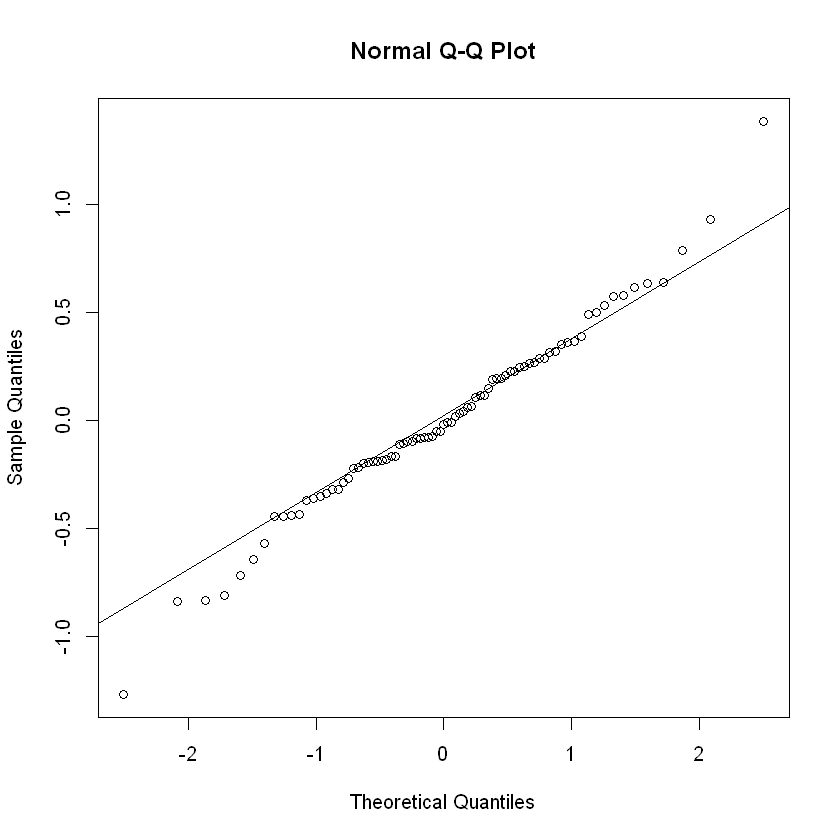

In [120]:
## tentative ARMA(2,2)
arma22 <- arima(y, order=c(2, 0, 2))
ll22 <- logLik(arma22)
aic22 <- arma22$aic
res22 <- residuals(arma22)
print("AIC for ARMA (2,2) is:")
aic22
#tsdiag(arma11)
tsdiag(arma22)
Box.test(res22, lag = 20, type =  "Ljung-Box")
shapiro.test(res22)

library(tseries)
jarque.bera.test(res22)
qqnorm(res22)
qqline(res22)


## ARMA (1,1)

[1] "AIC for model ARMA (1,1) is:"


[1] 101.3554


	Box-Ljung test

data:  res11
X-squared = 15.336, df = 20, p-value = 0.7569



	Shapiro-Wilk normality test

data:  res11
W = 0.98575, p-value = 0.5102



	Jarque Bera Test

data:  res11
X-squared = 4.4485, df = 2, p-value = 0.1081


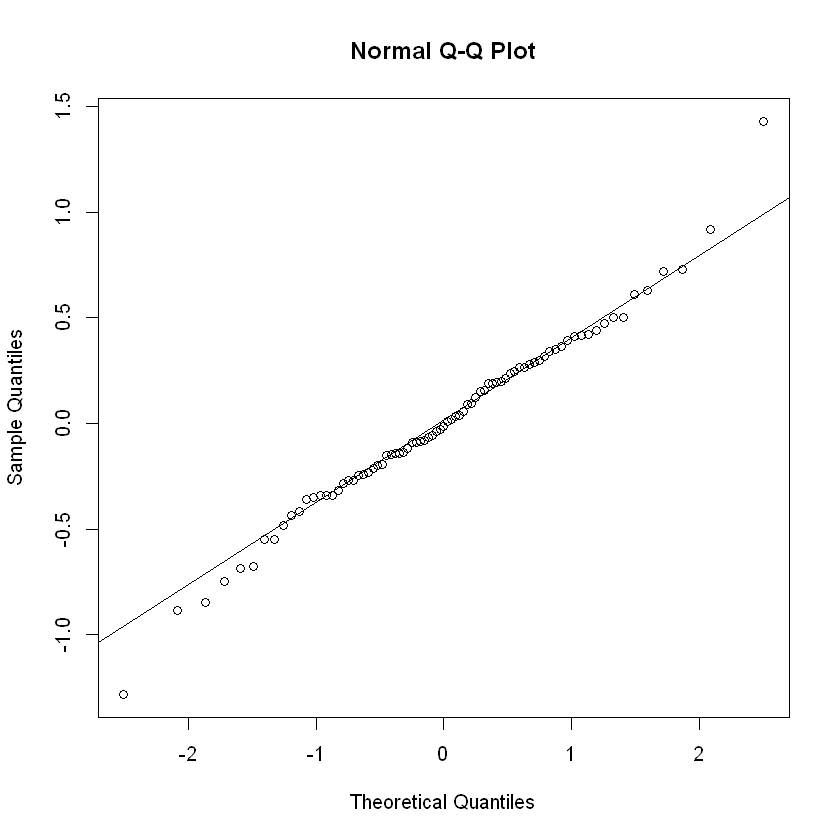

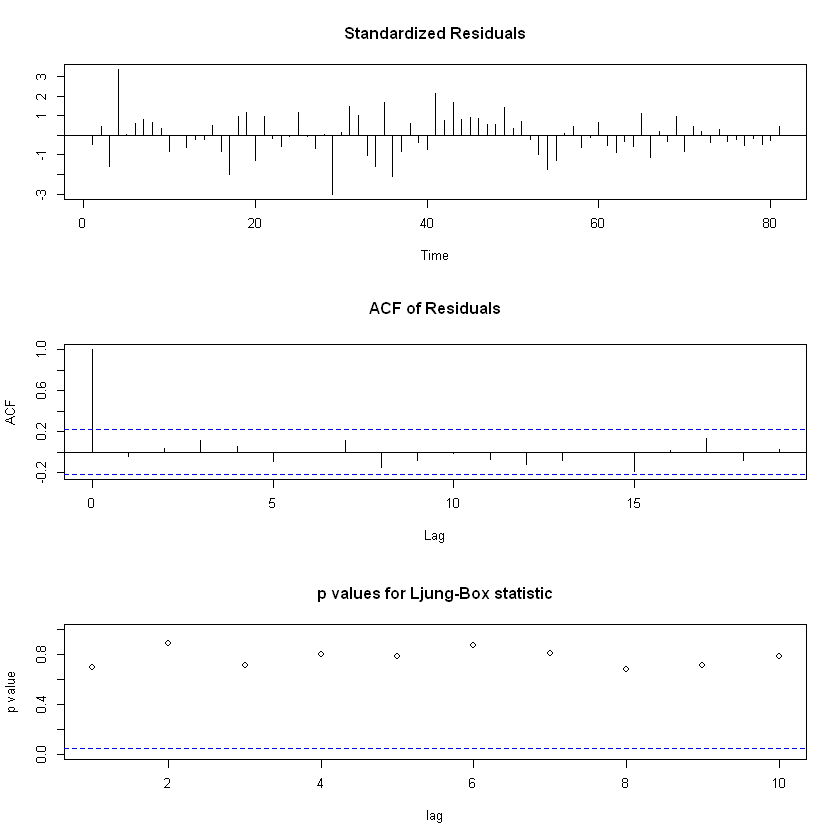

In [121]:
arma11 <- arima(y, order=c(1, 0, 1))
ll11 <- logLik(arma11)
aic11 <- arma11$aic
res11 <- residuals(arma11)
print("AIC for model ARMA (1,1) is:")
aic11
Box.test(res11, lag = 20, type = "Ljung-Box")
shapiro.test(res11)
jarque.bera.test(res11)
qqnorm(res11)
qqline(res11)
tsdiag(arma11)
tsdiag(arma11)


#### Results Interpretation
#### ARMA(2,2):


AIC: 103.86
Ljung-Box p-value: 0.9 (indicating little to no autocorrelation)

Shapiro-Wilk p-value: 0.4618 (not rejecting normality)

Jarque-Bera p-value: 0.134 (not rejecting normality)

##### ARMA(1,1):

AIC: 101.36

Ljung-Box p-value: 0.7569

Shapiro-Wilk p-value: 0.5102 (not rejecting normality)

Jarque-Bera p-value: 0.1081 (not rejecting normality)

The lack of autocorrelation in the residuals, as indicated by the Ljung-Box test results, is a good sign that the ARMA models are appropriately capturing the temporal structure in the data. ARMA 1,1 seems to capture the structure better according to the test.

The ARMA(1,1) model has a slightly lower AIC compared to the ARMA(2,2) model, suggesting it provides a better fit to the data considering its simplicity.

Both models seem to have residuals that do not exhibit autocorrelation and are normally distributed, based on the Ljung-Box, Shapiro-Wilk, and Jarque-Bera tests.

The residuals of the AMA 1,1 model also have a visually better fit along the QQplot line. 

Given the results, the ARMA(1,1) model is slightly preferred due to its lower AIC value, indicating a better balance between model fit and complexity.



### Model comparison

In [122]:
lrtest <- as.numeric(2*(ll22 - ll11))
lrtest
chi.pval <- pchisq(lrtest, df = 1, lower.tail = FALSE)
chi.pval

[1] 1.491821

[1] 0.2219341

.2219 p-value is not low enough to reject the null hypothesis (that the simpler model is sufficient), you do not have strong statistical evidence to favor the more complex ARMA(2,2) model over the simpler ARMA(1,1) model based on the data.

# Estimation of the coefficients of the model

In [123]:
chosen_model = arima(y,order = c(1,0,1))
chosen_model


Call:
arima(x = y, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.5227  0.5522     1.7010
s.e.  0.1215  0.1446     0.1518

sigma^2 estimated as 0.1827:  log likelihood = -46.68,  aic = 101.36

# Validation of the model

In [124]:
library(forecast)
fit <- auto.arima(y)
summary(fit)


Series: y 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1    mean
      0.5227  0.5522  1.7010
s.e.  0.1215  0.1446  0.1518

sigma^2 estimated as 0.1897:  log likelihood=-46.68
AIC=101.36   AICc=101.88   BIC=110.93

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.005137948 0.4274081 0.3303897 -12.97194 29.55058 0.9225713
                    ACF1
Training set -0.04286302


Auto arima agrees with us

### ARMA 2,2

### ARMA 1,1


Call:
arima(x = y, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.5227  0.5522     1.7010
s.e.  0.1215  0.1446     0.1518

sigma^2 estimated as 0.1827:  log likelihood = -46.68,  aic = 101.36

'log Lik.' -46.67771 (df=4)

[1] 101.3554


	Box-Ljung test

data:  res11
X-squared = 15.336, df = 20, p-value = 0.7569



	Shapiro-Wilk normality test

data:  res11
W = 0.98575, p-value = 0.5102



	Jarque Bera Test

data:  res11
X-squared = 4.4485, df = 2, p-value = 0.1081


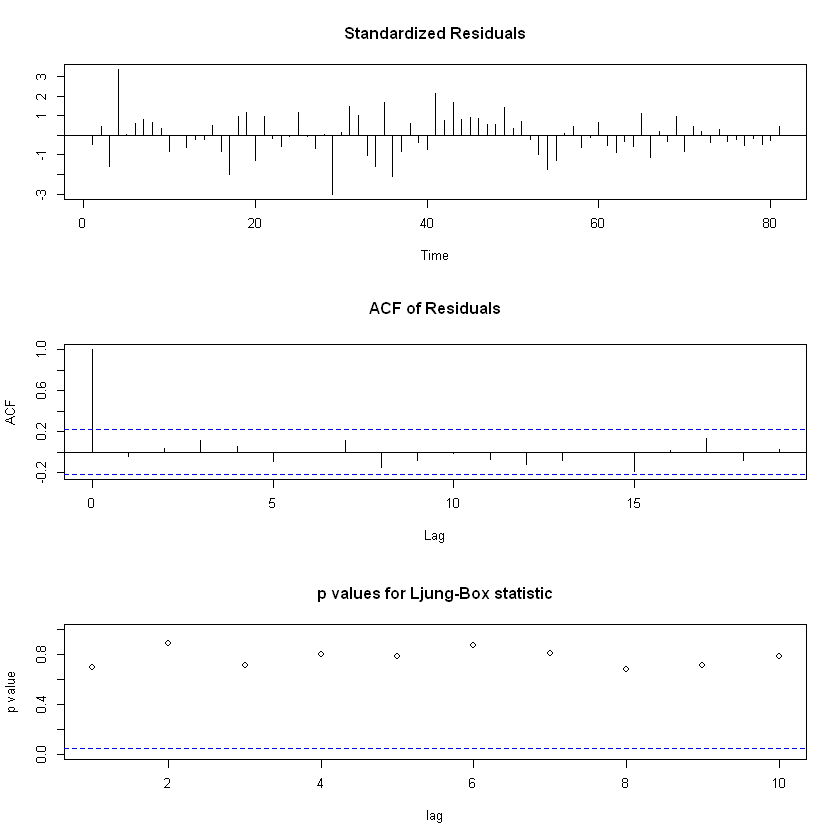

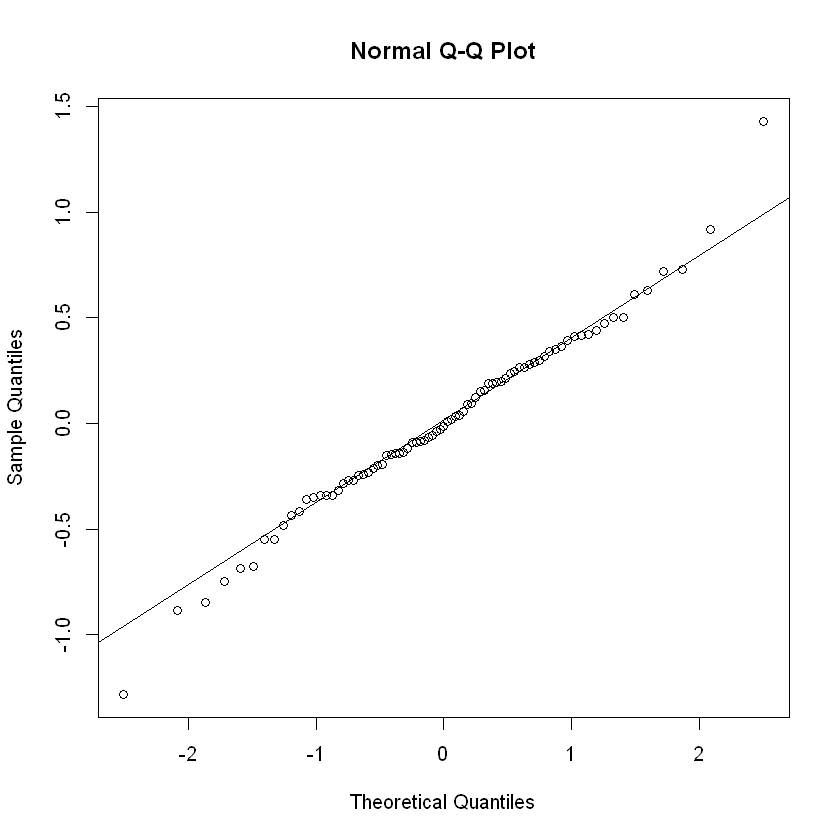

In [125]:
## ARMA(1,1)
arma11 <- arima(y, order = c(1, 0, 1))
arma11
ll11 <- logLik(arma11)
ll11
aic11 <- arma11$aic
aic11
tsdiag(arma11)
res11 <- residuals(arma11)
Box.test(res11, lag = 20, type =  "Ljung-Box")
shapiro.test(res11)
jarque.bera.test(res11)
qqnorm(res11)
qqline(res11)



# Prediction

### Predictions to compare to Nelson - Plosser

Time Series:
Start = 82 
End = 91 
Frequency = 1 
 [1] 1.746789 1.724926 1.713499 1.707526 1.704404 1.702772 1.701919 1.701473
 [9] 1.701240 1.701119


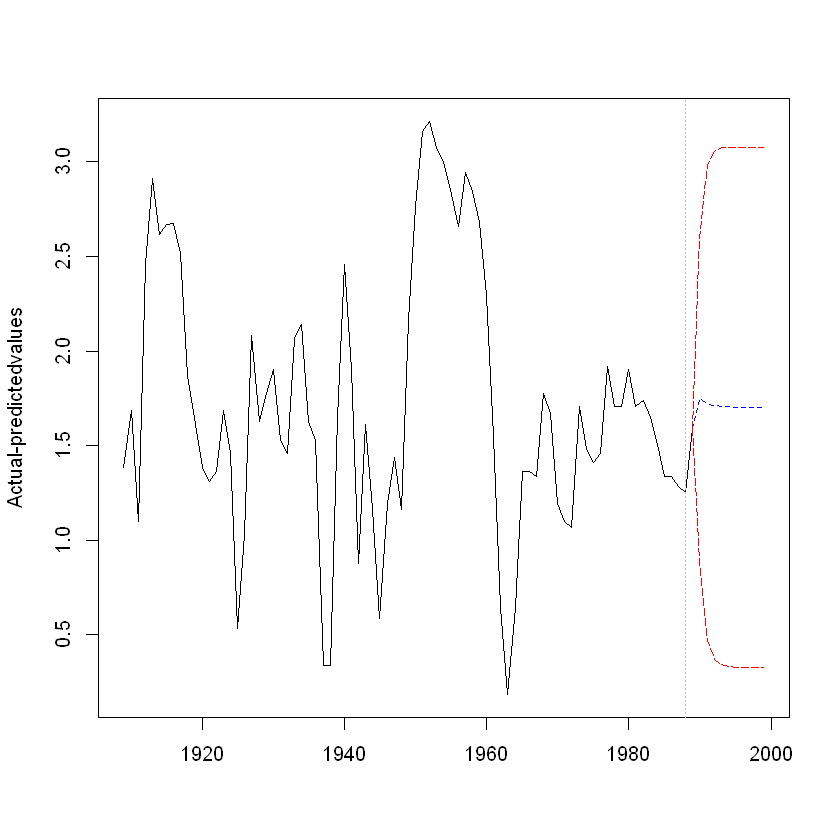

In [126]:
arma11.pred<-predict(arma11,n.ahead=10)
 predict<- ts(c(rep(NA,length(y)-1),y[length(y)],
 arma11.pred$pred),start=1909, frequency=1)
 upper<-ts(c(rep(NA,length(y)-1),y[length(y)],
 arma11.pred$pred+2*arma11.pred$se),
 start=1909,frequency=1)
 lower<-ts(c(rep(NA,length(y)-1),y[length(y)],
 arma11.pred$pred-2*arma11.pred$se),start=1909,frequency=1)
 observed<-ts(c(y,rep(NA,10)),start=1909,frequency=1)
 ##Plotof actualandforecastedvalues
 plot(observed,type="l",ylab="Actual-predictedvalues",xlab="")
 lines(predict,col="blue",lty=2)
 lines(lower, col="red",lty=5)
 lines(upper, col="red",lty=5)
 abline(v= 1988,col="gray",lty=3)
logged_pred = data.frame(arma11.pred)
print(logged_pred$pred)

### Actual predictions, transforming back to original scale

Time Series:
Start = 82 
End = 91 
Frequency = 1 
 [1] 5.736154 5.612105 5.548339 5.515298 5.498107 5.489143 5.484463 5.482019
 [9] 5.480742 5.480074


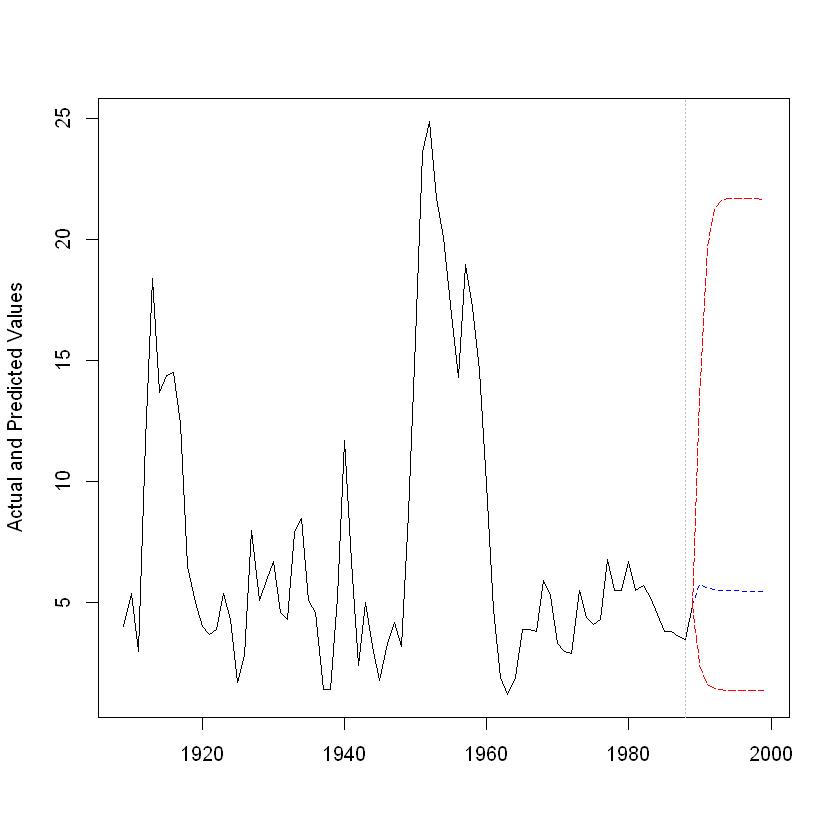

In [127]:
last_observed_value <- exp(y[length(y)])

# Transforming the predicted values back to the original scale
exp_predictions <- exp(arma11.pred$pred)
exp_upper <- exp(arma11.pred$pred + 2*arma11.pred$se)
exp_lower <- exp(arma11.pred$pred - 2*arma11.pred$se)

predict <- ts(c(rep(NA, length(y)-1), last_observed_value, exp_predictions), start=1909, frequency=1)
upper <- ts(c(rep(NA, length(y)-1), last_observed_value, exp_upper), start=1909, frequency=1)
lower <- ts(c(rep(NA, length(y)-1), last_observed_value, exp_lower), start=1909, frequency=1)

# Transforming 'y' values back to the original scale
observed <- exp(y)
observed <- ts(c(observed, rep(NA, 10)), start=1909, frequency=1)
plot(observed, type="l", ylab="Actual and Predicted Values", xlab="")
lines(predict, col="blue", lty=2)  # Forecasted values
lines(lower, col="red", lty=5)     # Lower bound
lines(upper, col="red", lty=5)     # Upper bound
abline(v = 1988, col="gray", lty=3) 
logged_pred = data.frame(arma11.pred)
print(exp(logged_pred$pred))
